Question 26: Construct a dataframe called spamonly consisting of only spam SMS. How many duplicates are there in this new dataframe?

In [10]:
import pandas as pd

df_sms = pd.read_csv('SMSSpamCollection', sep='\t', encoding='latin-1', header=None)
df_sms.columns = ['label', 'message']

print("DataFrame loaded successfully with the following head:")
print(df_sms.head())

DataFrame loaded successfully with the following head:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [13]:
spamonly = df_sms[df_sms['label'] == 'spam']

print("First 5 rows of the spamonly DataFrame:")
print(spamonly.head())

First 5 rows of the spamonly DataFrame:
   label                                            message
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...


In [15]:
duplicate_spam_messages = spamonly['message'].duplicated().sum()

print(f"Total number of duplicate spam messages: {duplicate_spam_messages}")

Total number of duplicate spam messages: 94


Question 27: What is the total number of SMS in the spamonly dataframe after removing duplicates?

In [17]:
spamonly_unique = spamonly.drop_duplicates(subset=['message'])

total_unique_spam_messages = len(spamonly_unique)

print(f"Total number of unique spam SMS in the spamonly DataFrame: {total_unique_spam_messages}")

Total number of unique spam SMS in the spamonly DataFrame: 653


Question 28: What is the average length (characters_count) of all messages in the full SMS dataset (round to 2 decimal places)? The full SMS dataset should be duplicate free.

In [19]:
# Remove duplicates from the full df_sms DataFrame
df_sms_unique = df_sms.drop_duplicates(subset=['message']).copy()

# Calculate the length of each message
df_sms_unique['characters_count'] = df_sms_unique['message'].apply(len)

# Calculate the average length and round to 2 decimal places
average_message_length = round(df_sms_unique['characters_count'].mean(), 2)

print(f"The average length of messages in the duplicate-free full SMS dataset is: {average_message_length}")

The average length of messages in the duplicate-free full SMS dataset is: 79.47


Question 29: What is the maximum sentences_count in the duplicate free full SMS dataset?

In [20]:
import re

def count_sentences(message):
    # Split the message by sentence-ending punctuation followed by a space or end of string
    # and then count the non-empty parts
    sentences = re.split(r'[.!?]\s*', message)
    # Filter out empty strings that might result from splitting
    # e.g., 'Hello!!'.split('!!') would give ['', 'Hello', '']
    return len([s for s in sentences if s])

# Apply the function to the 'message' column to create 'sentences_count'
df_sms_unique['sentences_count'] = df_sms_unique['message'].apply(count_sentences)

# Find the maximum sentences_count
max_sentences_count = df_sms_unique['sentences_count'].max()

print(f"The maximum sentences_count in the duplicate-free full SMS dataset is: {max_sentences_count}")

The maximum sentences_count in the duplicate-free full SMS dataset is: 31


Question 30: What is the minimum words_count in the duplicate free full SMS dataset?

In [22]:
def count_words(message):
    # Split the message by spaces and count the non-empty parts
    words = message.split()
    return len(words)

# Apply the function to the 'message' column to create 'words_count'
df_sms_unique['words_count'] = df_sms_unique['message'].apply(count_words)

# Find the minimum words_count
min_words_count = df_sms_unique['words_count'].min()

print(f"The minimum words_count in the duplicate-free full SMS dataset is: {min_words_count}")

The minimum words_count in the duplicate-free full SMS dataset is: 1


Question 31: What is the highest number of captial letters in the first five SMS of the duplicate free full dataset?

In [24]:
def count_capital_letters(message):
    return sum(1 for char in message if char.isupper())

# Get the first five messages from the duplicate-free DataFrame
first_five_messages = df_sms_unique['message'].head(5)

# Apply the function to count capital letters for each of the first five messages
capital_counts = first_five_messages.apply(count_capital_letters)

# Find the maximum capital letter count
max_capital_letters = capital_counts.max()

print(f"The highest number of capital letters in the first five SMS of the duplicate-free full dataset is: {max_capital_letters}")

The highest number of capital letters in the first five SMS of the duplicate-free full dataset is: 10


Question 32: Create histograms of sentences_count, words_count, characters_count, and capitalization features for spam SMS in the duplicate free dataset. Which variable pair is right skewed in these histograms?


words_count and characters_count
words_count and sentences_count
sentences_count and capitalization
words_count and capitalization

In [26]:
df_spam_unique = df_sms_unique[df_sms_unique['label'] == 'spam'].copy()

def count_capital_letters(message):
    return sum(1 for char in message if char.isupper())

df_spam_unique['capital_letters_count'] = df_spam_unique['message'].apply(count_capital_letters)

print("First 5 rows of df_spam_unique with new features:")
print(df_spam_unique.head())

First 5 rows of df_spam_unique with new features:
   label                                            message  characters_count  \
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...               155   
5   spam  FreeMsg Hey there darling it's been 3 week's n...               148   
8   spam  WINNER!! As a valued network customer you have...               158   
9   spam  Had your mobile 11 months or more? U R entitle...               154   
11  spam  SIX chances to win CASH! From 100 to 20,000 po...               136   

    sentences_count  words_count  capital_letters_count  
2                 2           28                     10  
5                 5           32                      8  
8                 5           26                     13  
9                 3           29                     14  
11                3           26                     17  


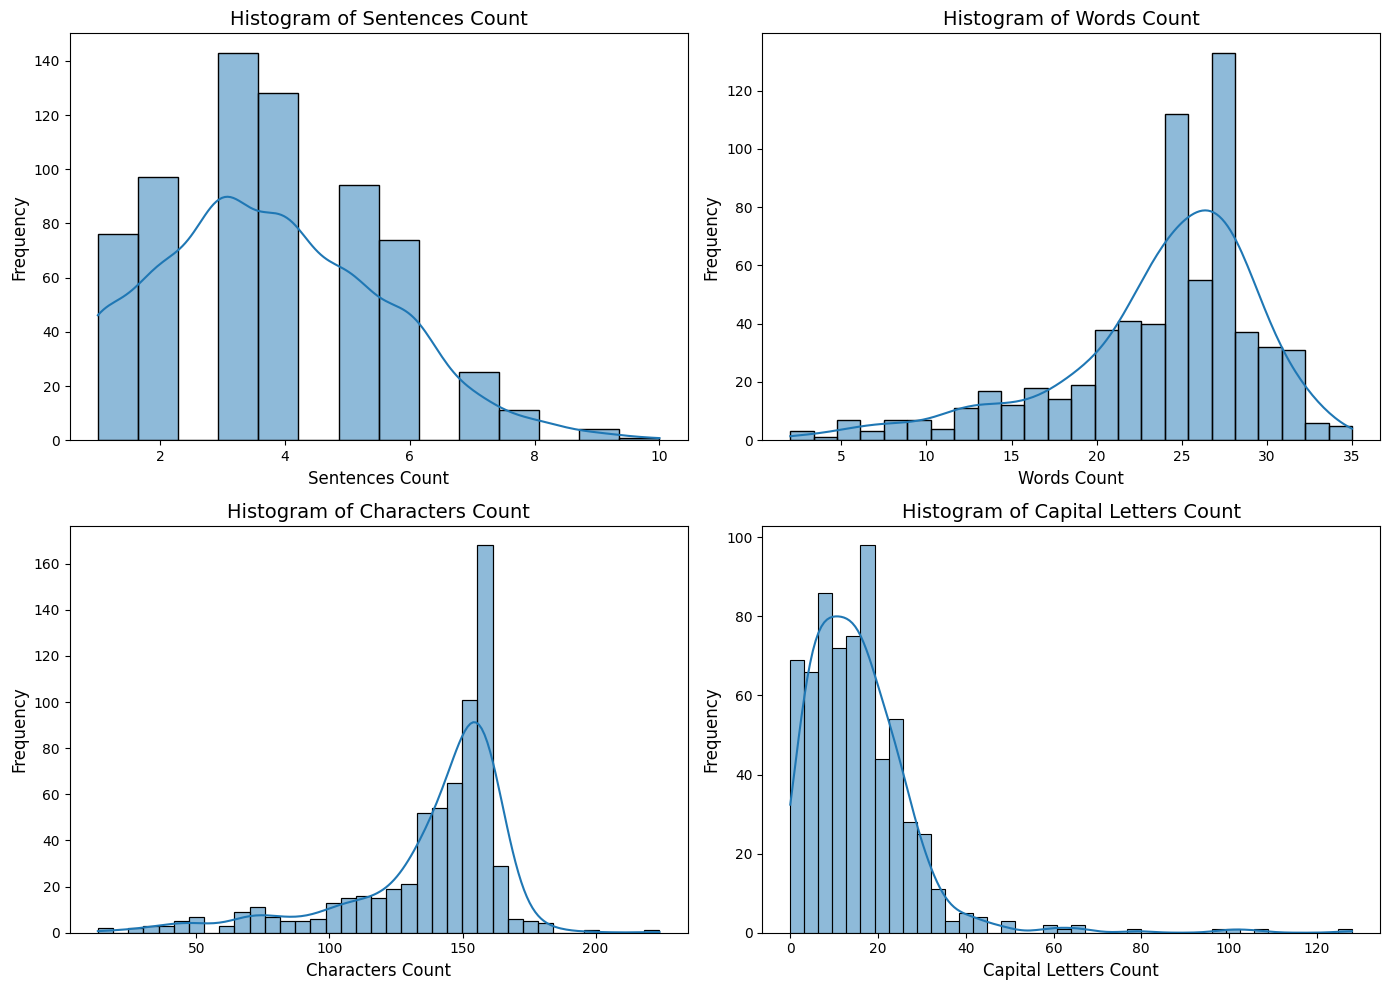

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the features to plot
features = ['sentences_count', 'words_count', 'characters_count', 'capital_letters_count']

# Generate histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(df_spam_unique[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel(feature.replace("_", " ").title(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust subplot parameters for a tight layout
plt.tight_layout()

# Display the figure
plt.show()


Question 33: Which of the following variable has the highest correlation with the target_encoded  variable (created using LabelEncoder on target variable) in the duplicate free whole SMS dataset?

numeric_count
capitalization
words_count
sentences_count

In [32]:
from sklearn.preprocessing import LabelEncoder

# 1. Create a target_encoded variable
le = LabelEncoder()
df_sms_unique['target_encoded'] = le.fit_transform(df_sms_unique['label'])

# 2. Ensure capital_letters_count and numeric_count are available in df_sms_unique
def count_capital_letters(message):
    return sum(1 for char in message if char.isupper())

def count_numeric_characters(message):
    return sum(1 for char in message if char.isdigit())

df_sms_unique['capital_letters_count'] = df_sms_unique['message'].apply(count_capital_letters)
df_sms_unique['numeric_count'] = df_sms_unique['message'].apply(count_numeric_characters)

# 3. Calculate correlations
features_to_correlate = [
    'numeric_count', # Changed from characters_count to numeric_count
    'capital_letters_count',
    'words_count',
    'sentences_count'
]

correlations = df_sms_unique[features_to_correlate + ['target_encoded']].corr()['target_encoded']

# Remove self-correlation (correlation of target_encoded with itself)
correlations = correlations.drop('target_encoded')

# 4. Identify the feature with the highest absolute correlation
highest_correlation_feature = correlations.abs().idxmax()
max_correlation_value = correlations[highest_correlation_feature]

print(f"The feature with the highest correlation (absolute value) with target_encoded is: '{highest_correlation_feature}' with a correlation of {max_correlation_value:.4f}")

The feature with the highest correlation (absolute value) with target_encoded is: 'numeric_count' with a correlation of 0.8369


Question 34: There is imbalance between the number of ham and spam SMS in this dataset. Which of the following steps should be taken in this case during train, test splitting?


The ratio of ham and spam should be same as original ratio (before splitting) in test set
The ratio of ham and spam should be greater than original ratio (before splitting) in test set
The ratio of ham and spam should be less than original ratio (before splitting) in train set
The ratio of ham and spam should be same as original ratio (before splitting) in train set
The number of spam messages should be greater than ham in train set

The ratio of ham and spam should be the same as the original ratio (before splitting) in the train set. This ensures your model learns from a representative sample.
The ratio of ham and spam should be the same as the original ratio (before splitting) in the test set. This ensures you can evaluate your model fairly on a representative sample of both classes.